# Account Balance Projection

Do you want to see a projection of your weekly account balance?

Do you want to find the optimal salary?

**Try the function below!**

**Input:**
1. Account Balance
2. Monthly income salary
3. Monthly income other (affiliate, freelance, ad-hock, sales, etc.)
4. Monthly Expenses (clothes, subscriptions, mortgage, rent, etc.)
5. Weekly expenses (food, restaurants, travel & more)

**Output:**
1. Account Balance per week
2. Weekly expenses
3. Monthly salary
4. Other Monthly income 
5. Monthly expenses


References:

https://stackoverflow.com/a/17496530/5438751

In [1]:
import pandas as pd
from pandas import *
import numpy
import datetime
import matplotlib as plt

### Balnace projection Function

In [4]:
df0=pd.DataFrame()

def balance_projection(start, periods, acc_balance, weekly_expense, salary, monthly_income_other, monthly_expenses):
    
    df0 = pd.DataFrame()
    df0['date'] = pd.date_range(start=start, periods=periods, freq='w')
    df0['Week_Number'] = df0['date'].dt.isocalendar().week
    df0['Month'] = df0['date'].dt.month    
    
    duplicate_list = []
    duplicate_list = df0.duplicated(subset=['Month'])
    
    salary_list = []
    for n in duplicate_list:
        if n == False:
            salary_list.append(salary)
        else:
            salary_list.append(0)
    df0['Salary'] = salary_list
    
    df0['Weekly Expenses'] = -weekly_expense
    
    total_monthly_expenses = sum(monthly_expenses.values())
    monthly_exp_list = []
    for n in duplicate_list:
        if n == False:
            monthly_exp_list.append(total_monthly_expenses)
        else:
            monthly_exp_list.append(0)
    df0['Monthly Expenses'] = monthly_exp_list
    
    rows_list = []
    new_acc_balance = 0
    for i in range(periods):
        dict1 = {}
        new_acc_balance += acc_balance - weekly_expense + salary_list[i] - monthly_exp_list[i]
        dict1.update(Account_Balance = new_acc_balance)
        rows_list.append(dict1) 
    df00 = pd.DataFrame(rows_list)
    df0 = df0.join(df00)
    df0.plot.line(x='Week_Number', y='Account_Balance')
    
    print(df0.dtypes)
    
    return df0

### Input your financial information

In [5]:
start = '03/07/2021'
periods = 40

acc_balance = 0
weekly_expense = 350
salary = 2000
monthly_income_other = 0
monthly_expenses = {} #see dict. below

# Monthly expenses dictionary
monthly_expenses = {"phone" : 22,
                    "apple_music" : 10,
                    "bank" : 10,
                    "icloud" : 7,
                    "free_mobile" : 2,
                    "other" : 350
                   }

### Call the function

date                datetime64[ns]
Week_Number                 UInt32
Month                        int64
Salary                       int64
Weekly Expenses              int64
Monthly Expenses             int64
Account_Balance              int64
dtype: object


,date,Week_Number,Month,Salary,Weekly Expenses,Monthly Expenses,Account_Balance
0,2021-03-07,9,3,2000,-350,401,1249
1,2021-03-14,10,3,0,-350,0,899
2,2021-03-21,11,3,0,-350,0,549
3,2021-03-28,12,3,0,-350,0,199
4,2021-04-04,13,4,2000,-350,401,1448
5,2021-04-11,14,4,0,-350,0,1098
6,2021-04-18,15,4,0,-350,0,748
7,2021-04-25,16,4,0,-350,0,398
8,2021-05-02,17,5,2000,-350,401,1647
9,2021-05-09,18,5,0,-350,0,1297


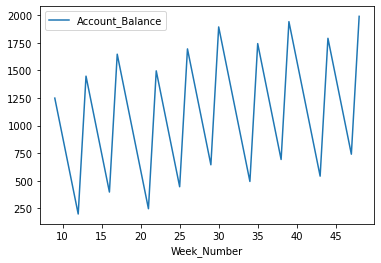

In [6]:
balance_projection(start, periods, acc_balance, weekly_expense, salary, monthly_income_other, monthly_expenses)

In [3]:
"""
    Y = df0.iloc[-1].values.reshape(-1, 1)  # values converts it into a numpy array
    X = df0.iloc[1].reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
    linear_regressor = LinearRegression()  # create object for the class
    linear_regressor.fit(X, Y)  # perform linear regression
    Y_pred = linear_regressor.predict(X)  # make predictions
    plt.scatter(X, Y)
    plt.plot(X, Y_pred, color='red')
    plt.show()
    
"""

"\n    Y = df0.iloc[-1].values.reshape(-1, 1)  # values converts it into a numpy array\n    X = df0.iloc[1].reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column\n    linear_regressor = LinearRegression()  # create object for the class\n    linear_regressor.fit(X, Y)  # perform linear regression\n    Y_pred = linear_regressor.predict(X)  # make predictions\n    plt.scatter(X, Y)\n    plt.plot(X, Y_pred, color='red')\n    plt.show()\n    \n"